# Fase 1: EDA

Equipo 55

Nombres y matrículas de los integrantes del Equipo:

*   Mario Arturo Salinas Rodriguez - A01796938
*   Ivan Rodriguez Apolinar - A01796052
*   Kailin Wu - A00830574
*   Jorge Zepeda Tinoco - A01797233
*   Marilyn Sofia Mori Castillo - A01796415

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../../data/clean/steel_energy_clean.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
0,2018-01-01 00:00:00,3.42,3.46,0.0,0.0,70.30,100.0,0.0,WEEKDAY,MONDAY,LIGHT_LOAD,907.000000
1,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900.0,WEEKDAY,MONDAY,LIGHT_LOAD,649.000000
2,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800.0,WEEKDAY,MONDAY,LIGHT_LOAD,497.651857
3,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,WEEKDAY,MONDAY,LIGHT_LOAD,696.000000
4,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,WEEKDAY,MONDAY,LIGHT_LOAD,630.000000


In [3]:
# Aseguramos el tipo datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [4]:
# Orden temporal
df = df.sort_values("date").reset_index(drop=True)

# Identificar columnas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

display(df.head(3))
print("Shape:", df.shape)
print("\nTipos:\n", df.dtypes)
print("\nResumen numérico:")
display(df[num_cols].describe().T)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
0,2018-01-01 00:00:00,3.42,3.46,0.0,0.0,70.30,100.0,0.0,WEEKDAY,MONDAY,LIGHT_LOAD,907.000000
1,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900.0,WEEKDAY,MONDAY,LIGHT_LOAD,649.000000
2,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800.0,WEEKDAY,MONDAY,LIGHT_LOAD,497.651857


Shape: (35412, 12)

Tipos:
 date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                            float64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
mixed_type_col                                 float64
dtype: object

Resumen numérico:


,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35412.0,37.026377,270.304220,0.0,3.28,4.610000,49.7200,34899.48
Lagging_Current_Reactive.Power_kVarh,35412.0,17.994711,88.817764,0.0,2.84,5.040000,21.3900,6145.92
Leading_Current_Reactive_Power_kVarh,35412.0,7.048661,51.499444,0.0,0.00,0.000000,1.1275,1694.22
CO2(tCO2),35412.0,2.413643,39.794918,0.0,0.00,0.000000,0.0200,1364.04
Lagging_Current_Power_Factor,35412.0,100.655456,304.988277,0.0,65.50,88.185000,98.2825,9900.00
Leading_Current_Power_Factor,35412.0,109.179848,363.270221,0.0,99.91,100.000000,100.0000,9800.00
NSM,35412.0,51987.097509,186128.720114,0.0,22500.00,43200.000000,63000.0000,7783200.00
mixed_type_col,35412.0,497.633101,241.894800,0.0,351.00,497.651857,638.0000,999.00


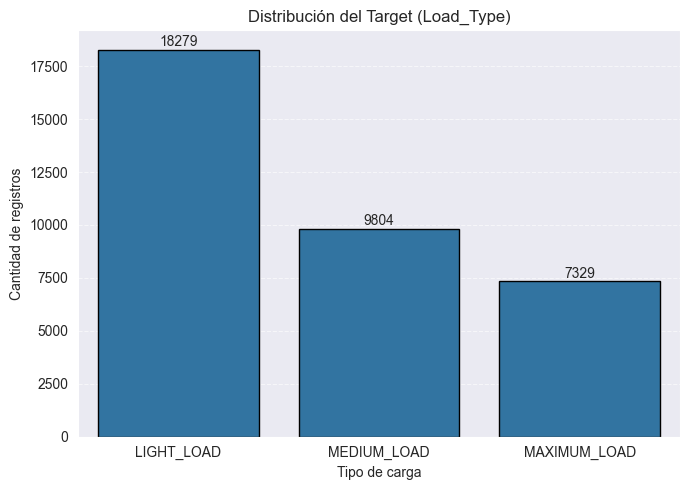


Distribución porcentual:


Load_Type
LIGHT_LOAD      51.618096
MEDIUM_LOAD     27.685530
MAXIMUM_LOAD    20.696374
Name: proportion, dtype: float64

In [5]:
# --- Gráfico de barras ---
plt.figure(figsize=(7, 5))
load_counts = df["Load_Type"].value_counts()
sns.barplot(
    x=load_counts.index,
    y=load_counts.values,
    edgecolor="black"
)

plt.title('Distribución del Target (Load_Type)')
plt.xlabel('Tipo de carga')
plt.ylabel('Cantidad de registros')
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Mostrar etiquetas de valor encima de cada barra
for i, v in enumerate(load_counts.values):
    plt.text(i, v + (0.01 * max(load_counts.values)), f"{v}", ha="center", fontsize=10)
plt.tight_layout()
plt.show()

print("\nDistribución porcentual:")
display(df['Load_Type'].value_counts(normalize=True) * 100)

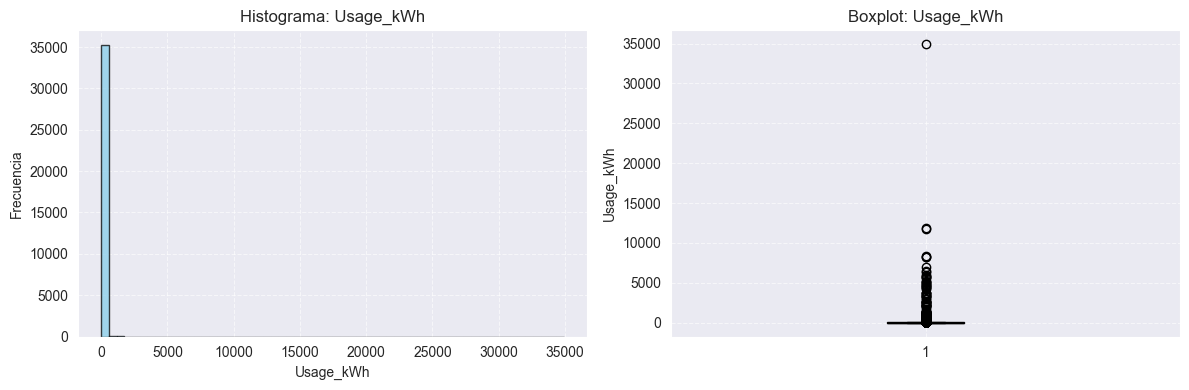

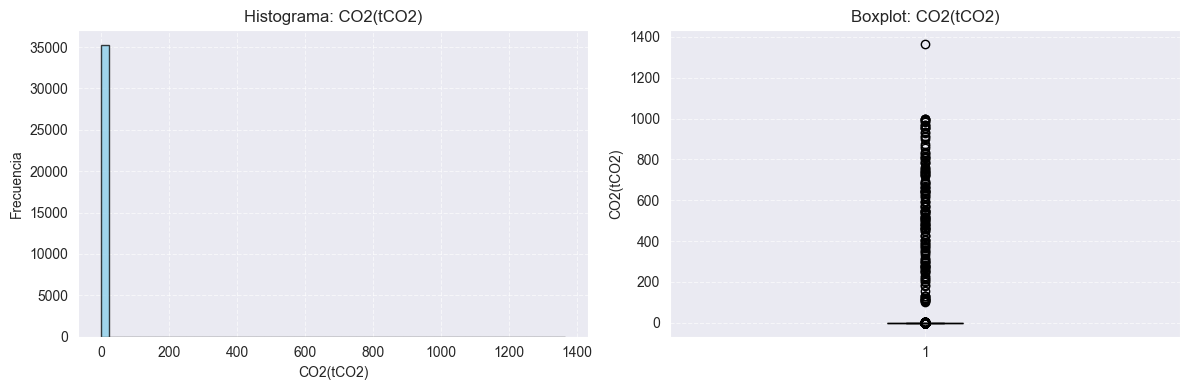

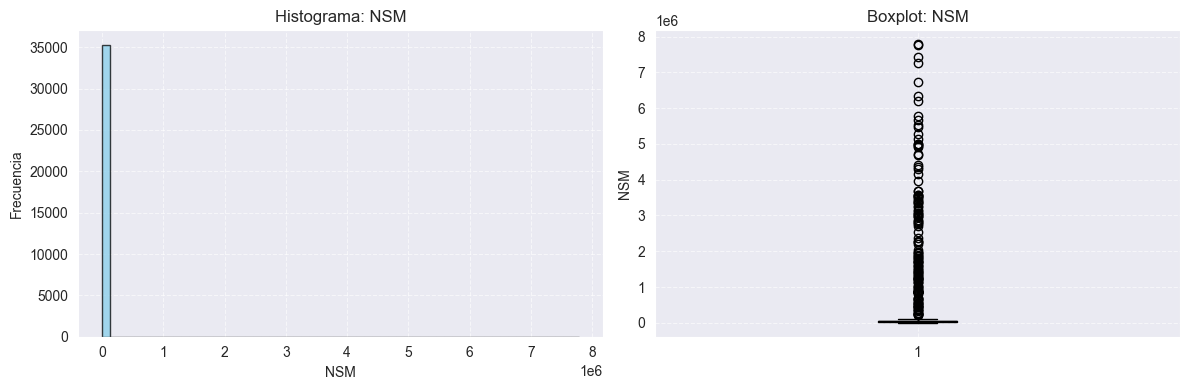

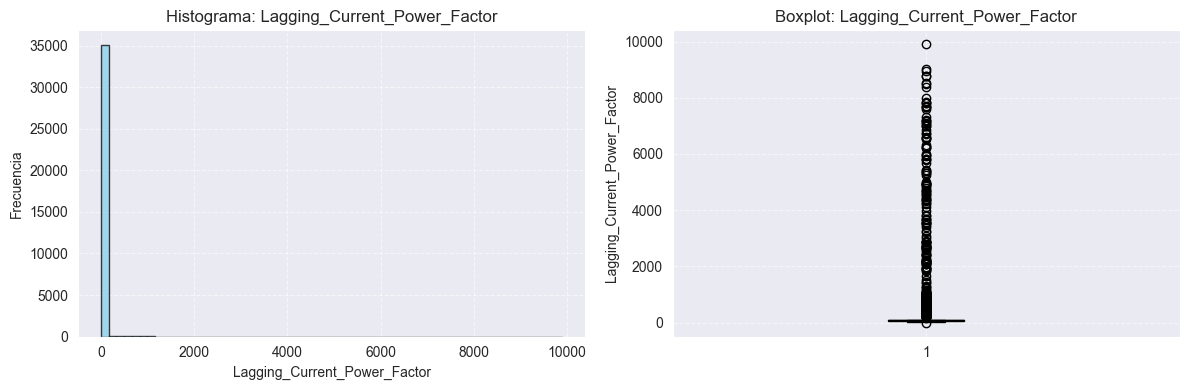

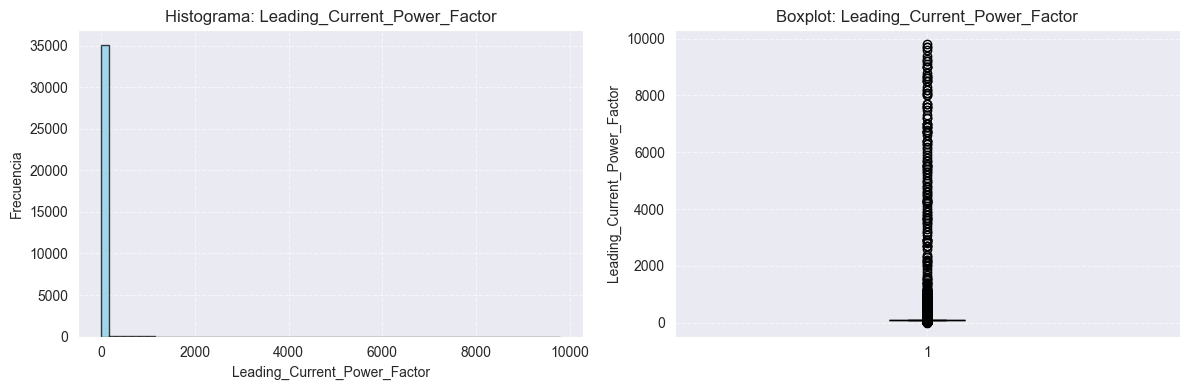

In [6]:
# ============================================
# Histogramas y Boxplots de métricas principales
# ============================================

# Lista de métricas de interés
focus_cols = [c for c in [
    "Usage_kWh", "CO2(tCO2)", "NSM",
    "Lagging_Current_Power_Factor", "Leading_Current_Power_Factor"
] if c in df.columns]

for col in focus_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histograma
    axes[0].hist(df[col].dropna(), bins=60, alpha=0.75, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histograma: {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frecuencia")
    axes[0].grid(True, linestyle="--", alpha=0.6)
    
    # Boxplot
    axes[1].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', color='black'),
                    medianprops=dict(color='black'))
    axes[1].set_title(f"Boxplot: {col}")
    axes[1].set_ylabel(col)
    axes[1].grid(True, linestyle="--", alpha=0.6)
    
    plt.tight_layout()
    plt.show()


In [7]:
# ============================================
# Detección de outliers (IQR)
# ============================================
# Calcular el IQR y los límites
outlier_info = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR

    # Guardar la información en un diccionario
    outlier_info[col] = {
        'Q1':Q1,
        'Q3':Q3,
        'IQR':IQR,
        'Limite inferior':limite_inferior,
        'Limite superior':limite_superior
    }

In [8]:
# Identificar outliers y calcular el porcentaje
outlier_stats = []

print("\nPorcentaje de outliers por variable:")
for col in num_cols:
    lim_inf = outlier_info[col]['Limite inferior']
    lim_sup = outlier_info[col]['Limite superior']
    outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    pct = (outliers.shape[0] / df.shape[0]) * 100
    outlier_stats.append({'Variable': col, 'Porcentaje_Outliers': pct})

# Convertir a DataFrame ordenado
outlier_df = pd.DataFrame(outlier_stats).sort_values(by='Porcentaje_Outliers', ascending=False)

display(outlier_df)


Porcentaje de outliers por variable:


,Variable,Porcentaje_Outliers
5,Leading_Current_Power_Factor,24.570767
2,Leading_Current_Reactive_Power_kVarh,23.252005
1,Lagging_Current_Reactive.Power_kVarh,4.888174
0,Usage_kWh,2.132046
3,CO2(tCO2),1.767762
4,Lagging_Current_Power_Factor,0.909296
6,NSM,0.400994
7,mixed_type_col,0.000000


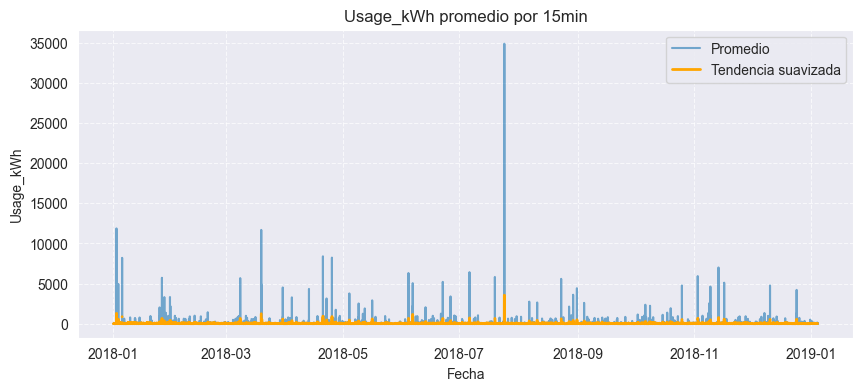

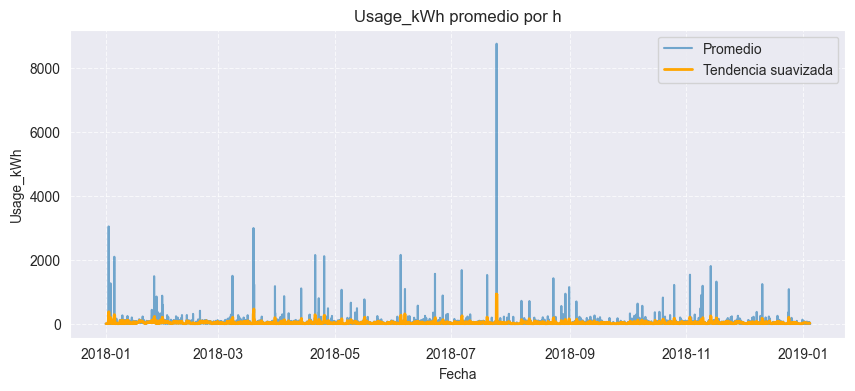

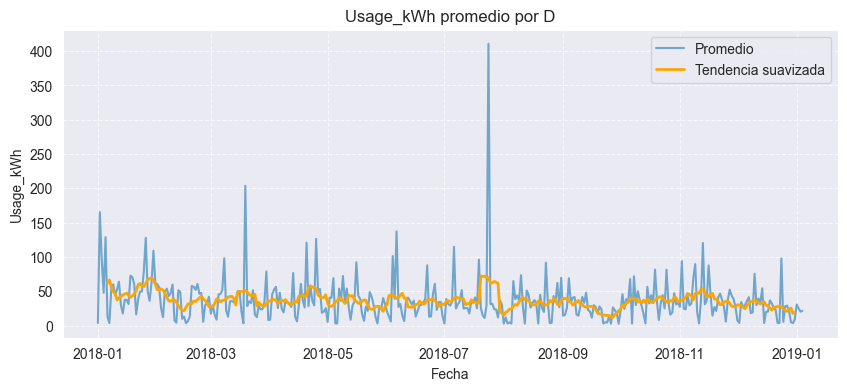

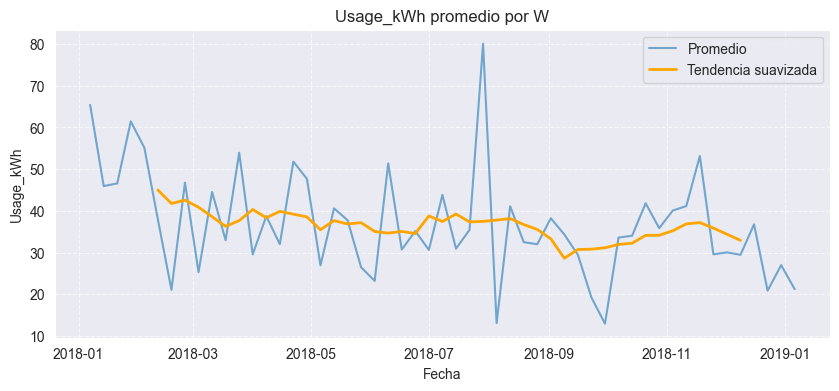

In [9]:
# ============================================
# Tendencias temporales (resample y smoothing)
# ============================================

def ts_plot(col, rule):
    """
    Muestra tendencias temporales promedio según el nivel de agregación (rule)
    """
    s = df.set_index("date")[col].resample(rule).mean()

    # Suavizado con media móvil
    s_smooth = s.rolling(window=10, center=True).mean()

    plt.figure(figsize=(10, 4))
    plt.plot(s, label='Promedio', alpha=0.6)
    plt.plot(s_smooth, color='orange', linewidth=2, label='Tendencia suavizada')
    plt.title(f"{col} promedio por {rule}")
    plt.xlabel("Fecha")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Ejecutar para columnas clave
#for col in ["Usage_kWh", "CO2(tCO2)", "NSM"]:
if "Usage_kWh" in df.columns:
    for rule in ["15min", "h", "D", "W"]:
        ts_plot("Usage_kWh", rule)


Análisis de WeekStatus sobre Usage_kWh:



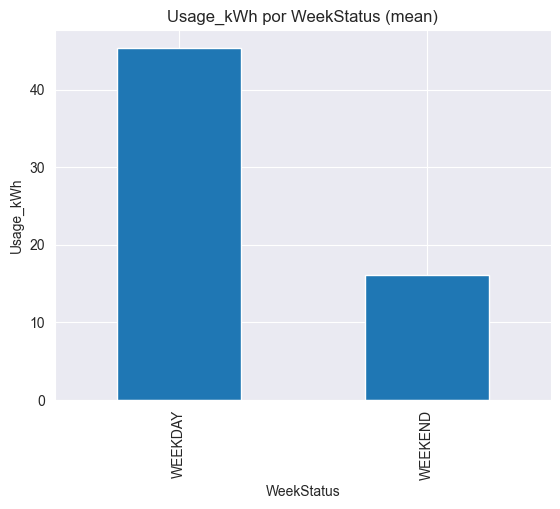

WeekStatus
WEEKDAY    45.410148
WEEKEND    16.012576
Name: Usage_kWh, dtype: float64


Análisis de Day_of_week sobre Usage_kWh:



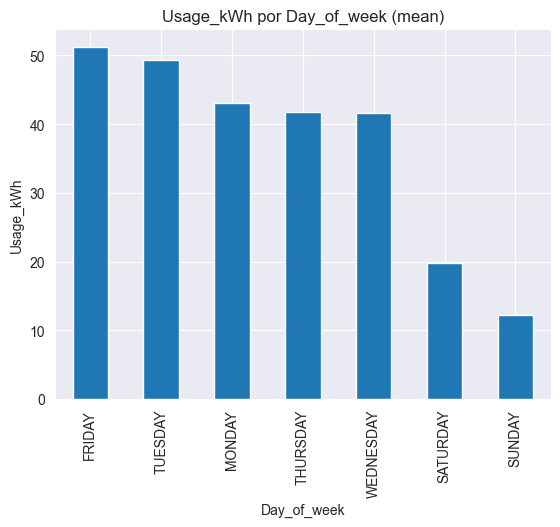

Day_of_week
FRIDAY       51.225752
TUESDAY      49.360571
MONDAY       43.074472
THURSDAY     41.802991
WEDNESDAY    41.595057
SATURDAY     19.809214
SUNDAY       12.226255
Name: Usage_kWh, dtype: float64


Análisis de Load_Type sobre Usage_kWh:



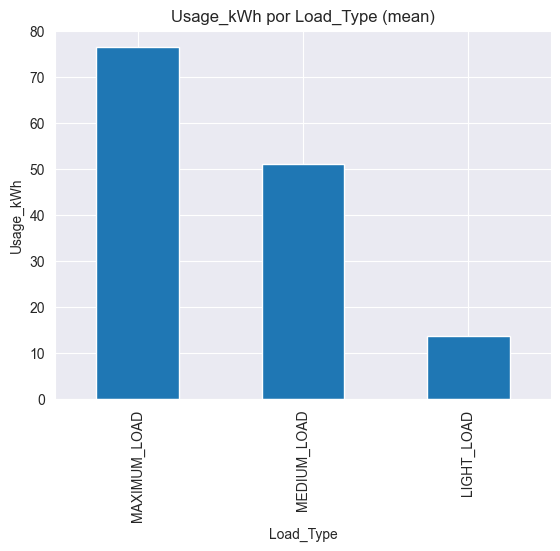

Load_Type
MAXIMUM_LOAD    76.401852
MEDIUM_LOAD     51.065502
LIGHT_LOAD      13.708777
Name: Usage_kWh, dtype: float64

In [10]:
# Comparativas por categoría
def bar_by_category(value_col, cat_col, agg="mean", palette="viridis"):
    tab = df.groupby(cat_col, dropna=False)[value_col].agg(agg).sort_values(ascending=False)
    plt.figure()
    tab.plot(kind="bar", title=f"{value_col} por {cat_col} ({agg})")
    plt.ylabel(value_col); plt.grid(True, axis="y"); plt.show()
    return tab

# Aplicar comparativa
if "Usage_kWh" in df.columns:
    for cat in ["WeekStatus", "Day_of_week", "Load_Type"]:
        if cat in df.columns:
            print(f"\nAnálisis de {cat} sobre Usage_kWh:\n")
            tabla = bar_by_category("Usage_kWh", cat, agg="mean")
            display(tabla)

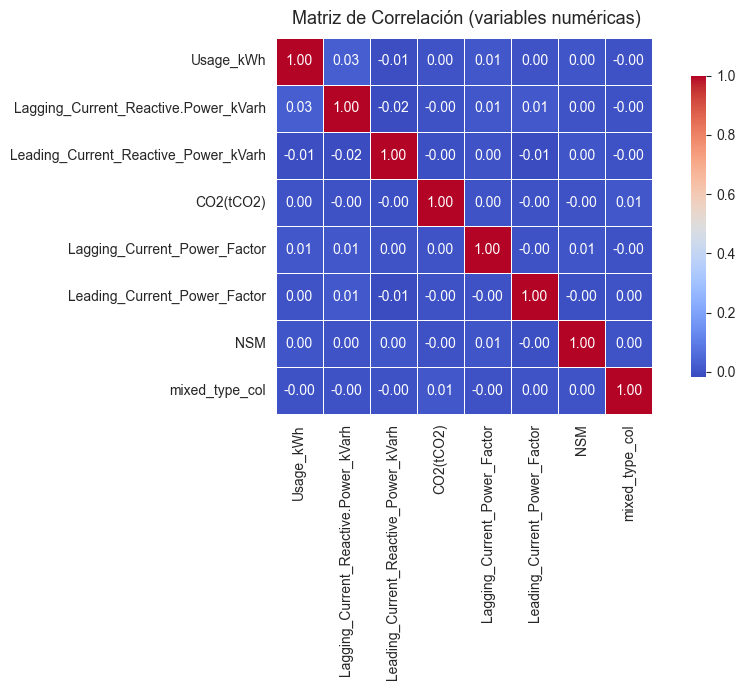

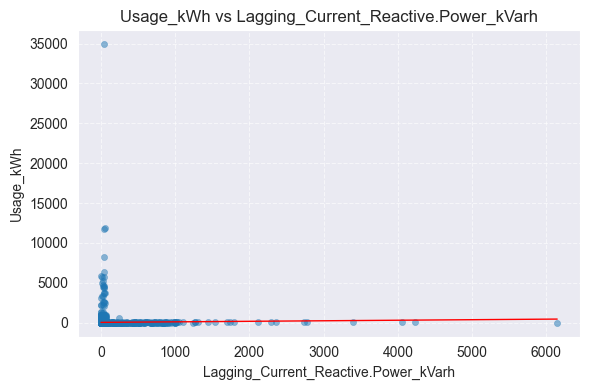

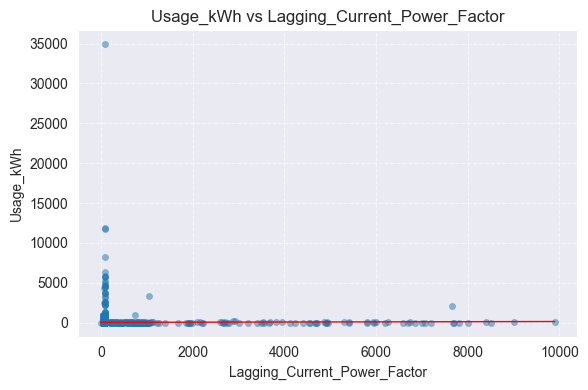

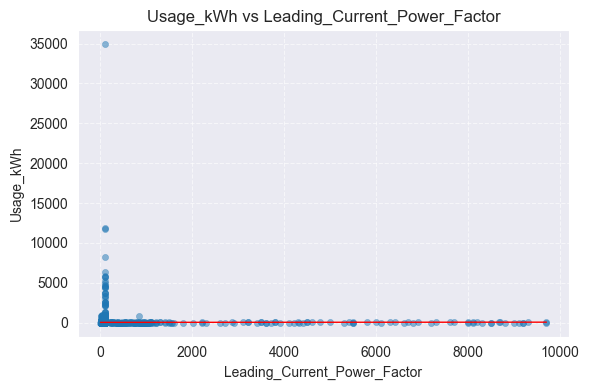

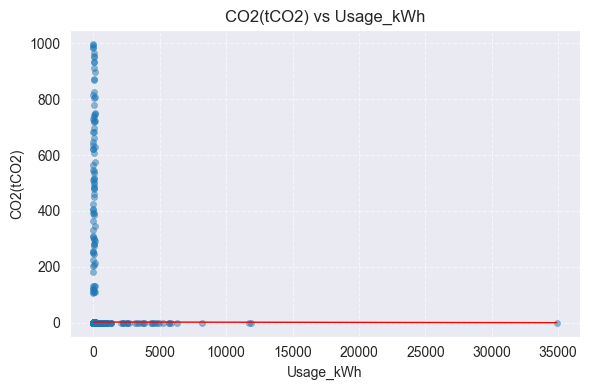

In [11]:
# ============================================
# Relaciones bivariadas y correlaciones
# ============================================

# --- Matriz de correlación (solo numéricas) ---
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 7))
sns.heatmap(
    corr,
    annot=True, fmt=".2f", cmap="coolwarm", 
    linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}
)
plt.title(" Matriz de Correlación (variables numéricas)", fontsize=13, pad=10)
plt.tight_layout()
plt.show()

# --- Dispersión de pares relevantes ---
pairs = [
    ("Lagging_Current_Reactive.Power_kVarh", "Usage_kWh"),
    ("Leading_Current_Reactive.Power_kVarh", "Usage_kWh"),
    ("Lagging_Current_Power_Factor", "Usage_kWh"),
    ("Leading_Current_Power_Factor", "Usage_kWh"),
    ("Usage_kWh", "CO2(tCO2)")
]

for x, y in pairs:
    if x in df.columns and y in df.columns:
        # Eliminar nulos y aplicar muestreo si es necesario
        sample = df[[x, y]].dropna()
        if len(sample) > 20000:
            sample = sample.sample(20000, random_state=42)

        plt.figure(figsize=(6, 4))
        sns.scatterplot(
            data=sample, x=x, y=y,
            alpha=0.5, edgecolor=None, s=20
        )
        sns.regplot(
            data=sample, x=x, y=y,
            scatter=False, color='red', ci=None, line_kws={'lw':1}
        )
        plt.title(f"{y} vs {x}", fontsize=12)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
